<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/LangChain%ED%95%99%EC%8A%B5/5_Retrieval_DocumentLoaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RAG란?
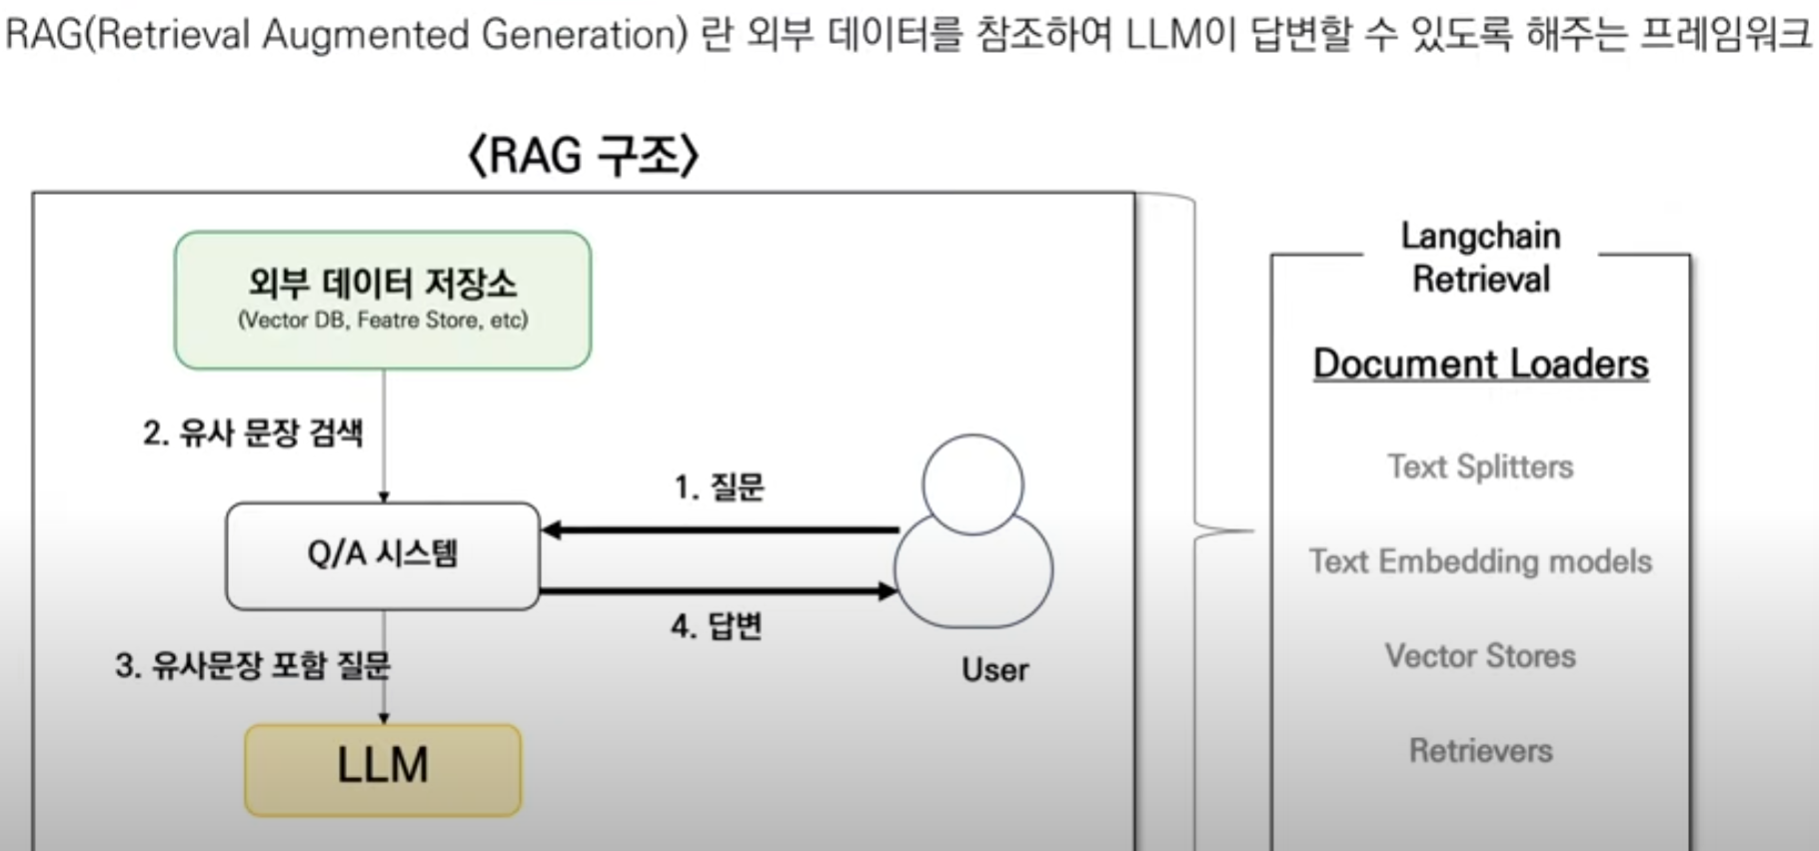

- 굳이 비싼 파인튜닝을 하지 않더라도 유사문장을 포함한 답변을 진행
- langChain의 Retrieval이 이를 가능하게 해줌

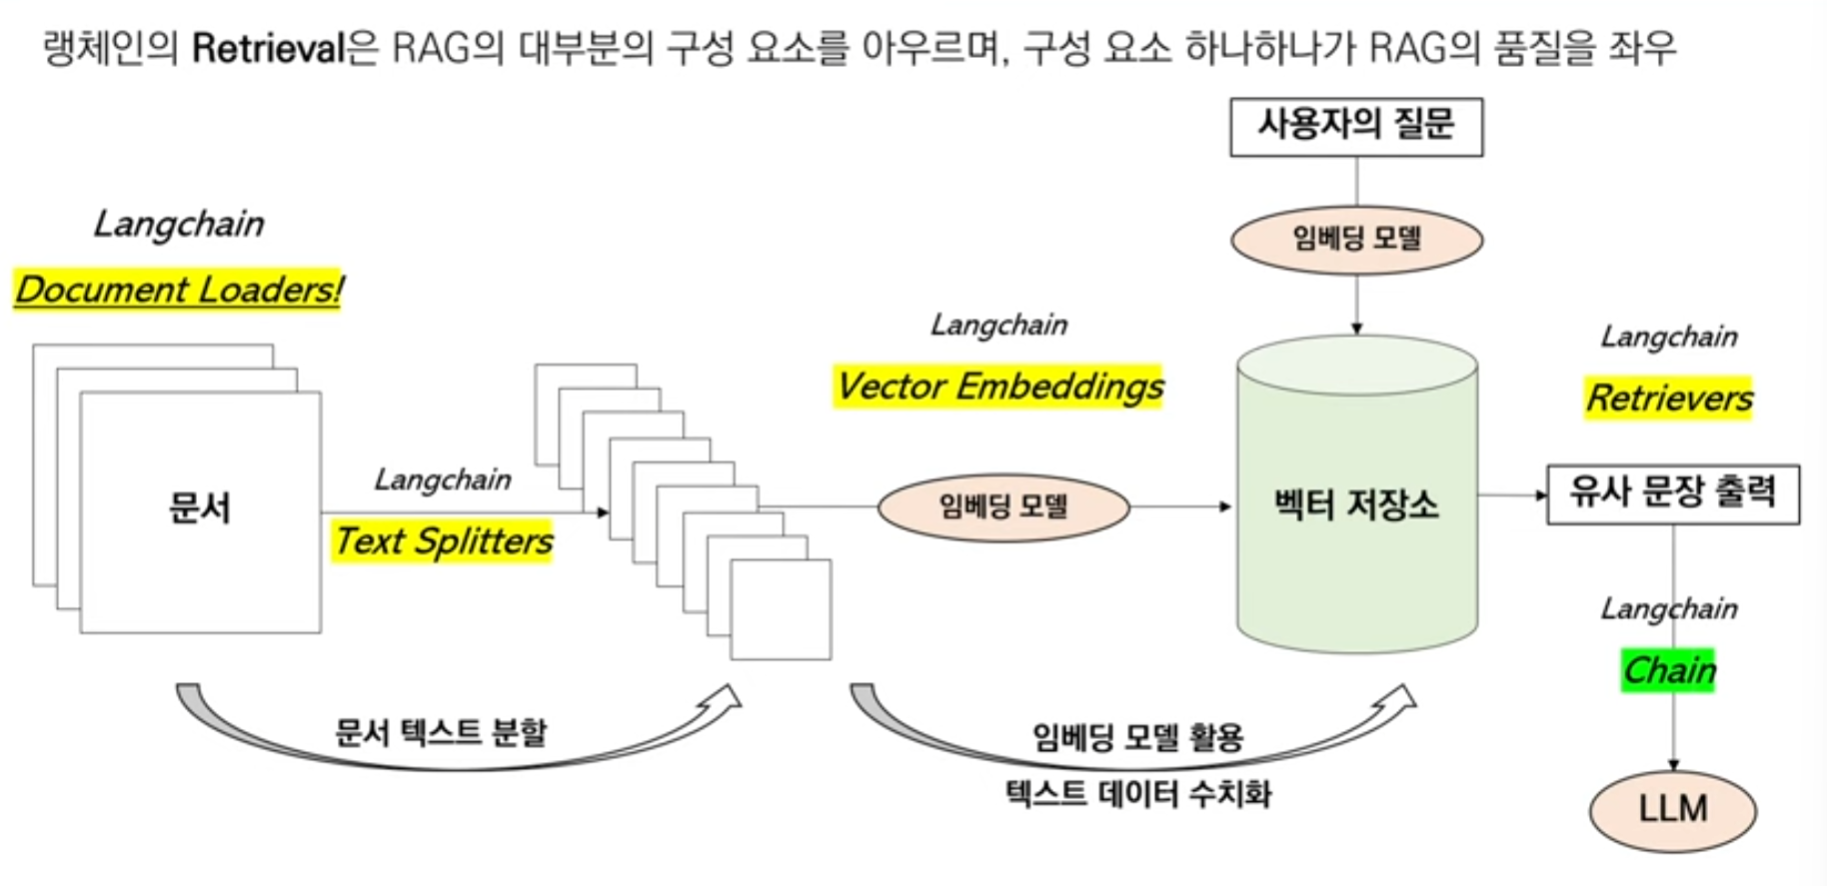

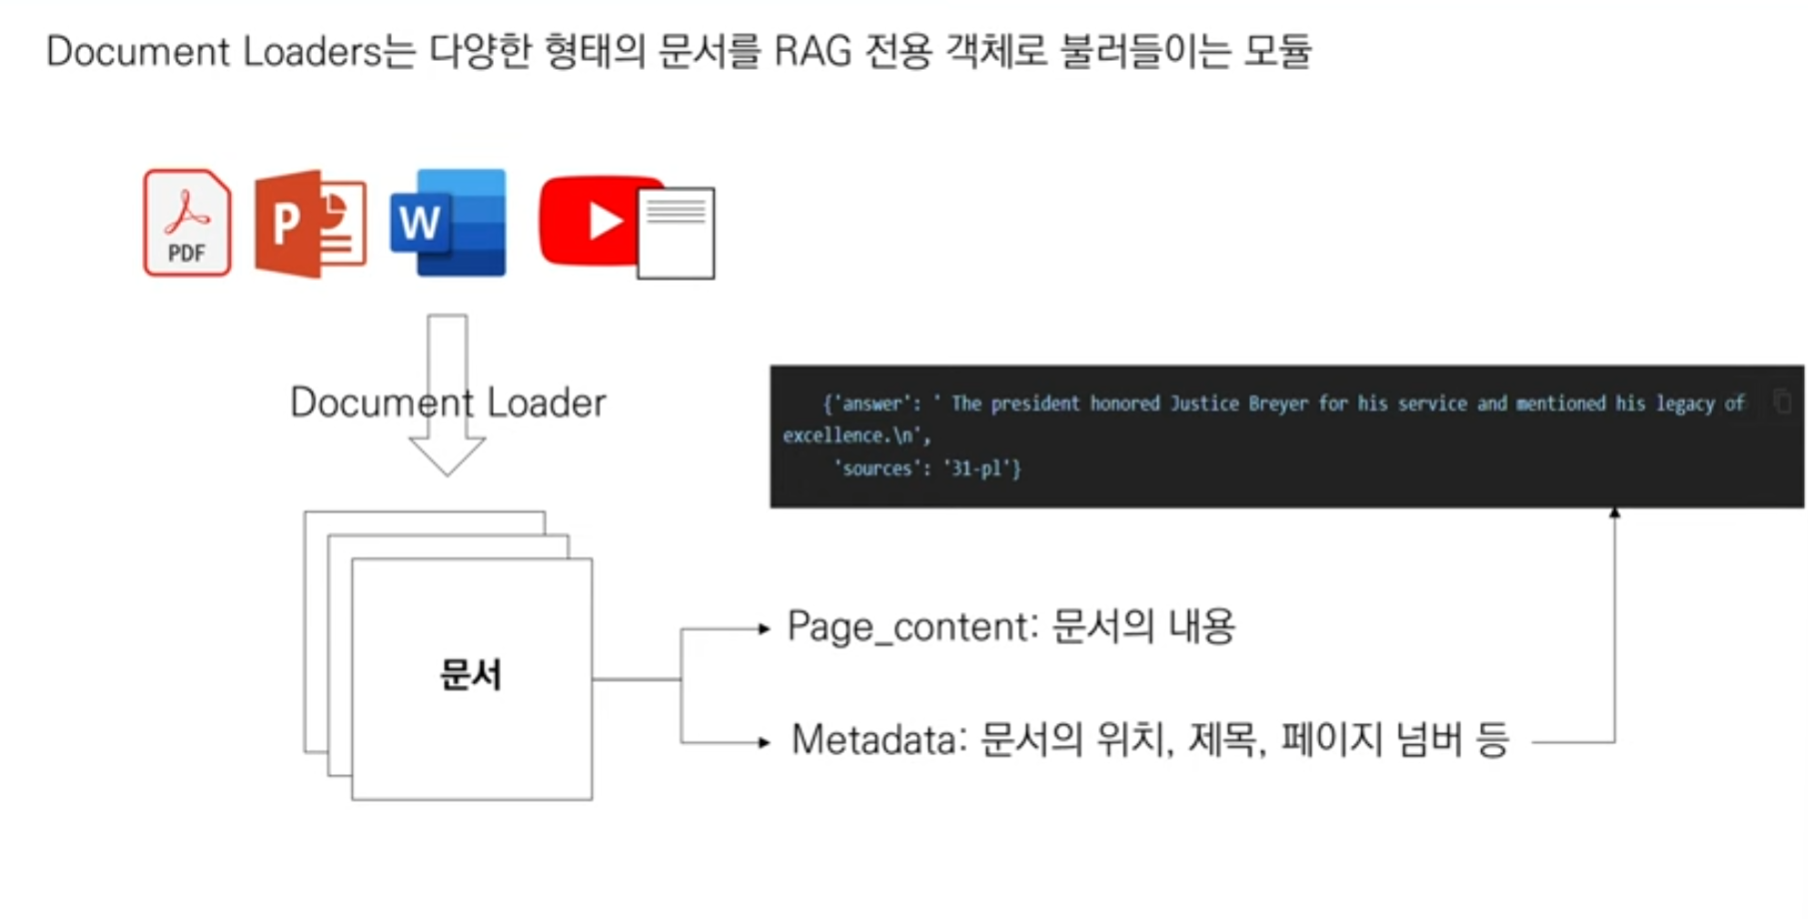

In [ ]:
!pip install langchain unstructured pypdf pdf2image docx2txt pdfminer

In [ ]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


## Document Loaders
Document Loader는 다양한 형식의 문서를 불러오고 이를 Langchain으로 결합하기 쉬운 텍스트 형태로 변환하는 기능을 합니다. 이를 통해 사용자는 txt 형식의 문서 뿐 아니라 pdf, word, ppt, xlsx, csv등 거의 모든 문서를 기반으로 LLM을 구동할 수 있습니다

### URL Document Loader
Langchain은 웹에 기록한 글도 텍스트 형식으로 가져와 LLM에 활용할 수 있습니다. 대표적인 URL Loader는 WebBas와 UnstructuredURLLoader가 있습니다.

In [ ]:
!pip install pdfminer

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader('https://n.news.naver.com/mnews/hotissue/article/421/0007283516?cid=2000002')
data = loader.load()
print(data[0].page_content[:50])

### PDF Loader

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader  = PyPDFLoader('/content/drive/MyDrive/SelfStudy/준비/571932.pdf')
pages =loader.load_and_split()

In [ ]:
pages[0]

Document(page_content='페로브스카이트 , 봉지 공정을  통해 단점을  극복. OLED 박막봉지 공정 응용 및 UTG \n활용 가능성도  제기되고  있음 \n 지난 9/10 발간한 리포트 “The Next Energy ”에서 차세대 태양전지로  가능성이 높은 \n페로브스카이트  태양전지(Perovskite Solar Cell, PSC) 를 분석하였다 . 당사는 지속적으로  \nPSC가 차세대 태양전지로  성장할 가능성이 높음을 전망해 왔고, 최근 리포트 발간 후 \n세미나를 통해 시장에서 제기된 몇 가지 질문에 대한 당사의 전망을 추가한다  \n \nPSC와 관련한 가장 큰 우려는 산소, 습기 등 외부 자극에 대한 취약성이다 . 이는 PSC \n물질 자체의 내성을 강화하려는 움직임과 함께, 봉지(Encapsulation) 공정을 통해 외부 \n자극을 차단하여 해결될 것으로 전망된다. 특히, OLED 봉지공정에서  적용된 공정들이 PSC \n제작 공정에 응용될 것으로 전망된다. OLED 역시 습기에 취약한데, 봉지공정을  통해 이를 \n극복하고있다 . 무엇보다 우리나라는  이미 롤러블, 폴더블 OLED 디스플레이를  만들 수 \n있을 정도로 기술력을 갖추고 있기 때문에, 국내 PSC 기술력이 양산면에서도  산업을 선도 \n할 수 있는 위치를 점할 가능성이 높다고 판단한다.  \n  \nPSC 봉지 공정에서 요구되는 사항은 크게 3가지로 정리 할 수 있다. 소재, 기술, 패터닝 \n전략이다. 소재는 1)우수한 가공성, 2)화학적 불활성, 3)산소 및 수분에 대한 높은 차단 성능, \n4)낮은 수분 및 산소 흡수율과 투과성을 가져야 할 것이다. 이외에도 높은 빛 투과율, \n자외선 성능저하 및 열산화에 대한 내구성이 필요하며, 기계적 강도와 접착성 등이 역시 \n필요하다. 유리, 폴리머 등을 활용 될 것인데, 이를 어떠한 방법으로 봉지 작업을 할 \n것인가도 중요하다. \n \n \n \n \n     신재생  에너지   OVERWEIGHT   \n

### Doc Loader

In [ ]:
from langchain.document_loaders import Docx2txtLoader
loader = Docx2txtLoader('/content/drive/MyDrive/SelfStudy/기타정리/GA문제은행.docx')
data = loader.load()
data

### CSV Loader

In [ ]:
from langchain.document_loaders import CSVLoader
loader = CSVLoader('/content/drive/MyDrive/SelfStudy/ds4th_study/archive/1. 문제 해결 프로세스/dataset/bikesharing/test.csv', csv_args={
                       'delimiter':',',
                       'fieldnames':['datetime',	'season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count']
                   })
data = loader.load()
data